<a href="https://colab.research.google.com/github/MMKOWSI/uteruscancer_identification/blob/main/DL_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Dec  2 05:49:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
import zipfile

with zipfile.ZipFile('/content/Cancer Detection.v1i.tensorflow.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
import tensorflow as tf

# Specify the path where the dataset is located
data_dir = '/content/dataset'  # Update with your path

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),  # Adjust based on your image size
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 1494 files belonging to 3 classes.
Using 1196 files for training.
Found 1494 files belonging to 3 classes.
Using 298 files for validation.


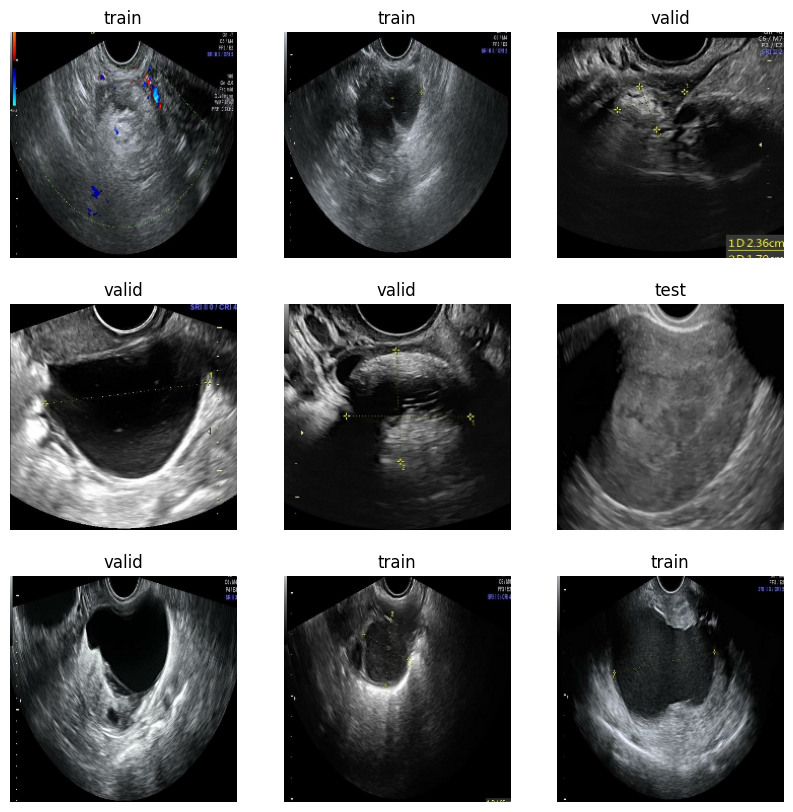

In [ ]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB7

# Define image dimensions and number of classes
IMG_HEIGHT, IMG_WIDTH = 224, 224
NUM_CLASSES = 2  # Update this based on your dataset

# Load the InceptionV3 base model with pre-trained ImageNet weights
base_model = EfficientNetB7(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)
base_model.trainable = False

# Input layer
inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Pass input through base model
x = base_model(inputs)

# Add pooling and custom layers
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
model = models.Model(inputs, outputs)

#Learning Rate
from tensorflow.keras.optimizers import Adam
# Set the learning rate to a specific value
learning_rate = 0.01  # Example value
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb7 (Functional)          │ (None, 7, 7, 2560)          │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2560)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         327,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,425,753 (245.76 MB)

 Trainable params: 328,066 (1.25 MB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20  # Adjust based on your need
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.6532 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - accuracy: 0.6921 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - accuracy: 0.6842 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - accuracy: 0.6770 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - accuracy: 0.6645 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.6895 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 321ms/step - accuracy: 0.6817 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.6912 - loss: nan - val_accuracy: 0.6913 - val_loss: nan
Epoch 9/20
38/38 ━

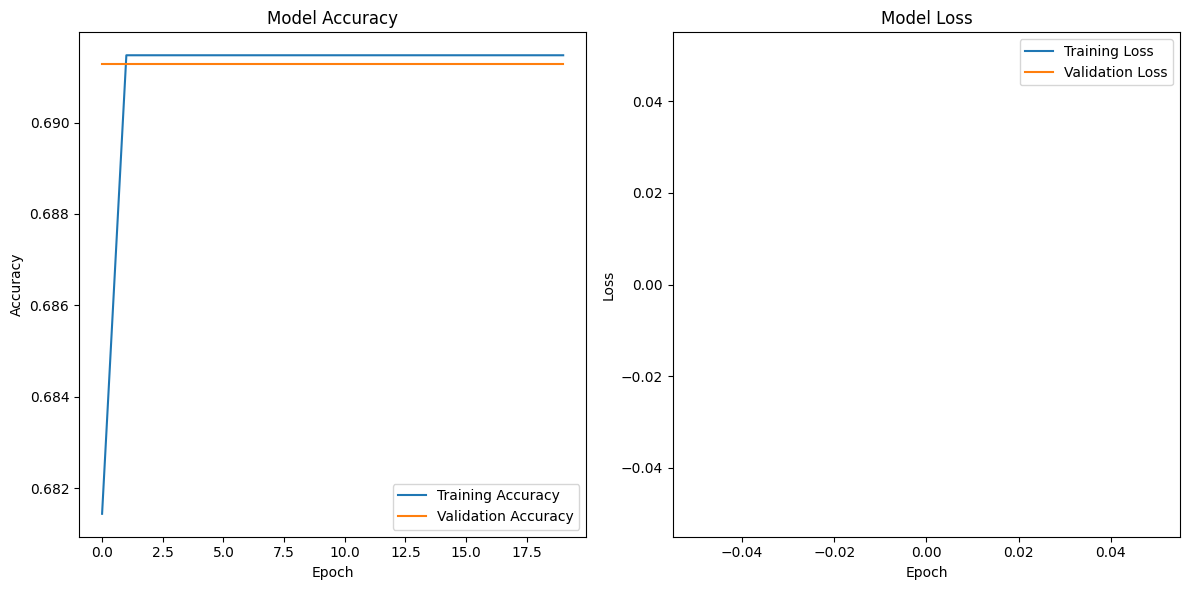

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model.fit()
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
import os

# List all files in the test directory
test_images = os.listdir('/content/dataset/test')
print(test_images[:10])  # Display the first 10 file names

['755_JPG.rf.e963880d8d7c5fcc0412e5d44808f2c2.jpg', '1087_JPG.rf.d44bb0b42405d77c349d58de9eb09aa4.jpg', '_annotations.csv', '958_JPG.rf.8556a48013e2252317c6d8b7c24e52f5.jpg', '521_JPG.rf.3a2f4965d9d59ee2434774799e06c40f.jpg', '631_JPG.rf.300ab889bf2fcbe5ad9579069e4f33db.jpg', '1339_JPG.rf.4fb278529bf61ff2ff3bbb34f848f5a7.jpg', '1113_JPG.rf.a2965e0aefd8ed012f181ec5f2f06074.jpg', '913_JPG.rf.2d84922810693a342093c47821c70e40.jpg', '675_JPG.rf.eb440bf6e53ca1b7e44cbcc26748b8a9.jpg']


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Define constants
IMG_HEIGHT = 224  # Replace with your target image height
IMG_WIDTH = 224   # Replace with your target image width
NUM_CLASSES = 3   # Adjust according to the number of classes you have
test_dir = '/content/dataset/test'  # Replace with your test directory path

# Check if the folder structure is correct, e.g., 'class_1', 'class_2', ...
print(os.listdir(test_dir))

# If the images are not in subdirectories, we will need to manually assign labels.
# Assuming you know the correct order for class labeling.
class_names = ['cancer', 'normal']  # Adjust with your actual class names
class_map = {class_names[i]: i for i in range(len(class_names))}

# Load and label images manually
def load_and_label_images(test_dir, class_names):
    images = []
    labels = []

    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)
        if img_name.endswith('.jpg'):
            # Load the image and resize
            img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img_array = image.img_to_array(img) / 255.0  # Normalize
            images.append(img_array)

            # Extract class based on filename
            # Ensure the extracted label is within the valid class range (0 to NUM_CLASSES-1)
            # Modify based on your labeling convention
            label = int(img_name.split('_')[0].replace('class', ''))  # Example if 'class' is in filename
            if label >= NUM_CLASSES:
                label = NUM_CLASSES - 1  # Ensure the label is within bounds
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and label the test images
test_images, test_labels = load_and_label_images(test_dir, class_names)

# Convert labels to one-hot encoding
test_labels = to_categorical(test_labels, num_classes=NUM_CLASSES)

# Check shapes
print(f"Shape of test_images: {test_images.shape}")
print(f"Shape of test_labels: {test_labels.shape}")


['755_JPG.rf.e963880d8d7c5fcc0412e5d44808f2c2.jpg', '1087_JPG.rf.d44bb0b42405d77c349d58de9eb09aa4.jpg', '_annotations.csv', '958_JPG.rf.8556a48013e2252317c6d8b7c24e52f5.jpg', '521_JPG.rf.3a2f4965d9d59ee2434774799e06c40f.jpg', '631_JPG.rf.300ab889bf2fcbe5ad9579069e4f33db.jpg', '1339_JPG.rf.4fb278529bf61ff2ff3bbb34f848f5a7.jpg', '1113_JPG.rf.a2965e0aefd8ed012f181ec5f2f06074.jpg', '913_JPG.rf.2d84922810693a342093c47821c70e40.jpg', '675_JPG.rf.eb440bf6e53ca1b7e44cbcc26748b8a9.jpg', '1393_JPG.rf.59ec9b918f7c12de0eb4e5f9461acf5a.jpg', '1276_JPG.rf.dd65a0e25cf74c818f41d3e8b029fb98.jpg', '507_JPG.rf.1714f6f1dca8ff3d729574c77c47e98b.jpg', '836_JPG.rf.30d650daff0a1c389299f703ed3857d1.jpg', '57_JPG.rf.e91380d5d848b6f2f8bcbc80bc95af22.jpg', '144_JPG.rf.1b7c98dfc91c95030ceccab44db044b6.jpg', '573_JPG.rf.77b9f4270481e610f3fcf0c4780261bf.jpg', '550_JPG.rf.193101483e5ae1a8479033b8939d9c5e.jpg', '664_JPG.rf.cd79566ef1a09bd7463505bf2e7c482c.jpg', 'WhatsApp Image 2024-12-02 at 10.56.43 (1).jpeg', '686_JP

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


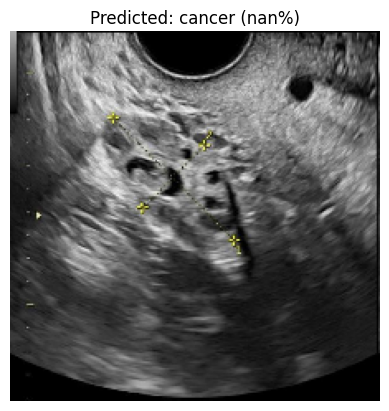

Image: /content/dataset/test/1393_JPG.rf.59ec9b918f7c12de0eb4e5f9461acf5a.jpg
Predicted Class: cancer
Confidence: nan%


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Path to your dataset directory
dataset_dir = '/content/dataset/test'  # Update with your dataset directory

# Function to recursively find all image file paths
def get_all_image_paths(directory):
    """
    Collects all image file paths from a directory (including subdirectories).
    """
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
                image_paths.append(os.path.join(root, file))
    return image_paths

# Get all image file paths from the dataset directory
all_image_paths = get_all_image_paths(dataset_dir)

# Randomly select an image path
random_image_path = np.random.choice(all_image_paths)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    """
    Preprocess the image for model prediction.
    - img_path: Path to the image file.
    - target_size: Size to which the image is resized.
    Returns the original image and the preprocessed image.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img, img_array

# Preprocess the selected image
img, preprocessed_img = preprocess_image(random_image_path)

# Predict the class using the already loaded model (assumes `model` is defined)
predictions = model.predict(preprocessed_img)  # No need to reload the model
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class index
confidence = predictions[0][predicted_class]  # Confidence of prediction

# Map class index to class name
class_names = ['cancer', 'normal']  # Update with your actual class names
predicted_label = class_names[predicted_class]

# Display the image and the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()

# Print the result
print(f"Image: {random_image_path}")
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence*100:.2f}%")
